In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
c0 = 1500
nx = 200
h = 10
dt = 0.003
nt = 1000
x0 = nx // 2
u = np.zeros((nt, nx+1))
u_next = np.zeros((nx + 1))
u_current = np.zeros((nx + 1))
u_prev = np.zeros((nx + 1))
f0   = 10. # dominant frequency of the source (Hz)
r = c0 * dt / h
n_per = c0 / (f0 * h)
print(f'r = {r}, number of grid per wavelength = {n_per}')

r = 0.45, number of grid per wavelength = 15.0


In [12]:
def deriv_xx(u):
    duxx = np.zeros_like(u)
    for i in range(1, nx):
        duxx[i] = (u[i+1] - 2 * u[i] + u[i-1]) / h ** 2
    return duxx

def src(t):
    t0   = 4. / f0 # source time shift
    w  = -8. * (t - t0) * f0 * (np.exp(-1.0 * (4*f0) ** 2 * (t - t0) ** 2))
    return w

def ricker(t):
    sigma = 1 / (np.pi * f0 * np.sqrt(2))
    t0 = 6 * sigma
    tmp = np.pi**2 * f0**2 * (t-t0)**2 
    w = (1 - 2*tmp) * np.exp(-tmp)
    return w

for n in range(nt):
    t = n * dt
    u_next = 2 * u_current -u_prev + (c0 * dt)**2 * deriv_xx(u_current)
    # u_next[x0] += src(t)
    u_next[x0] += ricker(t)
    u[n] = u_next
    u_current, u_prev = u_next, u_current

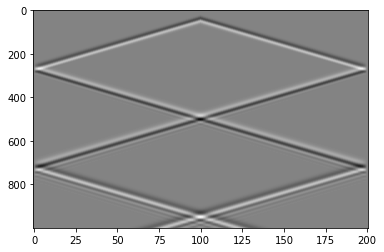

In [13]:
plt.imshow(u, cmap="gray", aspect="auto")

In [14]:
u.max(), u.min()

(11.099767353923056, -11.839648736189698)

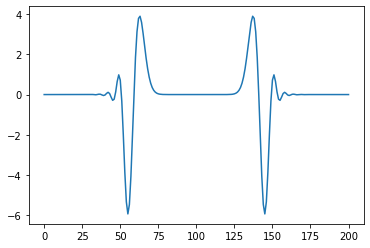

In [19]:
plt.plot(u[400])